<html>
<head>
    <style>
        hr {
            border: none;
            border-top: 2px solid black;
            margin: 20px 0;
        }
    </style>
</head>
    <img src="https://i.pinimg.com/564x/53/f4/3d/53f43de92a5ea87b17595154c579e578.jpg" width="130"       style="float: right; margin-left: 10px;">
    <hr>
    <span style="font-family: 'ALGERIAN', sans-serif; font-weight: bold; font-size: 22px; display: block";>Atividade de matéria condensada I</span>
    <span style="font-family: 'ALGERIAN', sans-serif;display: block">Aluno: Sérgio Servilha de Oliveira Filho</span>
    <hr>
</html>

#### **Fundamentação Teórica**
Nesta atividade procuro analisar a evolução das propriedades eletrônicas do MoS₂ ao introduzir vacâncias, utilizando um modelo tight-binding (TB) para investigar a influência de defeitos estruturais na estrutura de bandas do material. A fundamentação é baseada em 3 tópicos:

- **Vacâncias**: Vacâncias são defeitos em que átomos são removidos da estrutura cristalina. Em dicalcogenetos de metais de transição, como MoS₂, essas vacâncias podem criar estados eletrônicos localizados dentro do gap do material, potencialmente, induzindo fases topológicas.
- **Interação das vacâncias**: O aumento na densidade de vacâncias leva à formação de bandas dispersivas a partir dos estados localizados das vacâncias, assim permitindo que a interação desses estados com os orbitais.
- **Modelo Tight-Binding e hoppings**: O modelo empregado considera as interações de hopping de primeira vizinhança quanto de segunda vizinhança. A intensidade do hopping é modificada por (`alpha`), que infuencia a densidade de vacâncias.

#### **Implementação**

**Definição da rede cristalina e dos orbitais**
```python
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]  # Vetores de base da rede hexagonal
orb = [[1./3., 1./3.], [2./3., 1./3.], [1./3., 2./3.]]  # Posições dos orbitais
```
Os vetores da rede e as posições dos orbitais são definidos para representar a estrutura cristalina hexagonal do MoS₂. Essa configuração possibilita modelar uma célula contendo de três sítios, junto com a representação de vacâncias discutida em [1].

**Parametrização dos termos on-site e de hopping**
```python
t = -1.31  # Hopping entre sítios de primeira vizinhança
alpha = 0.1  # Parâmetro de modulação do hopping
onsite_energies = [0, 0, 0]  # Energias on-site
```
No código, a interação de hopping `t` foi ajustada para representar a interação em MoS₂. O parâmetro `alpha` controla a modulação do hopping.

**Introduzindo novas vacâncias hoppings**
```python
model.set_hop(t, 0, 1, [0, 0])
model.set_hop(t * alpha, 1, 0, [0, 1])  # Hopping modificado por alpha
```
Os termos de hopping são modificados pelo fator `alpha`. Hoppings reduzidos (`t * alpha`) representam menor interação eletrônica por causa do aumento da distância entre orbitais na presença de vacâncias.

#### **Cálculo da estrutura de bandas**
**Espaço k e resolução das bandas**
```python
k_vec, k_dist, k_node = model.k_path(path, nk)
evals = model.solve_all(k_vec)
```
O caminho no espaço k segue a trajetória padrão para sistemas hexagonais. A resolução das bandas de energia é feita para diferentes valores de `alpha`.

In [3]:
# Importando bibliotecas
from pythtb import * 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

C:\Users\sergio23040\AppData\Local\Temp\ipykernel_17728\3778708473.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', len(alphas))


----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [1.      0.5    ]
 [1.33333 0.66667]
 [2.      1.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.00000e+00 0.00000e+00]
 [6.66667e-01 1.56412e-17]
 [1.00000e+00 0.00000e+00]
 [1.33333e+00 3.12824e-17]
 [2.00000e+00 0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [1.  0.5]
  length = 0.33333  from  [1.  0.5]  to  [1.33333 0.66667]
  length = 0.66667  from  [1.33333 0.66667]  to  [2. 1.]
node distance list: [0.      0.66667 1.      1.33333 2.     ]
node index list:    [  0  40  60  80 120]
----- k_path report end ------------

----- k_path report begin ----------
real-space lattice vectors
 [

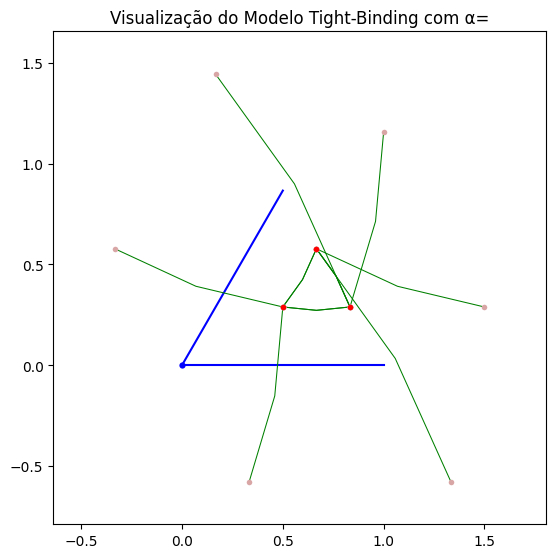

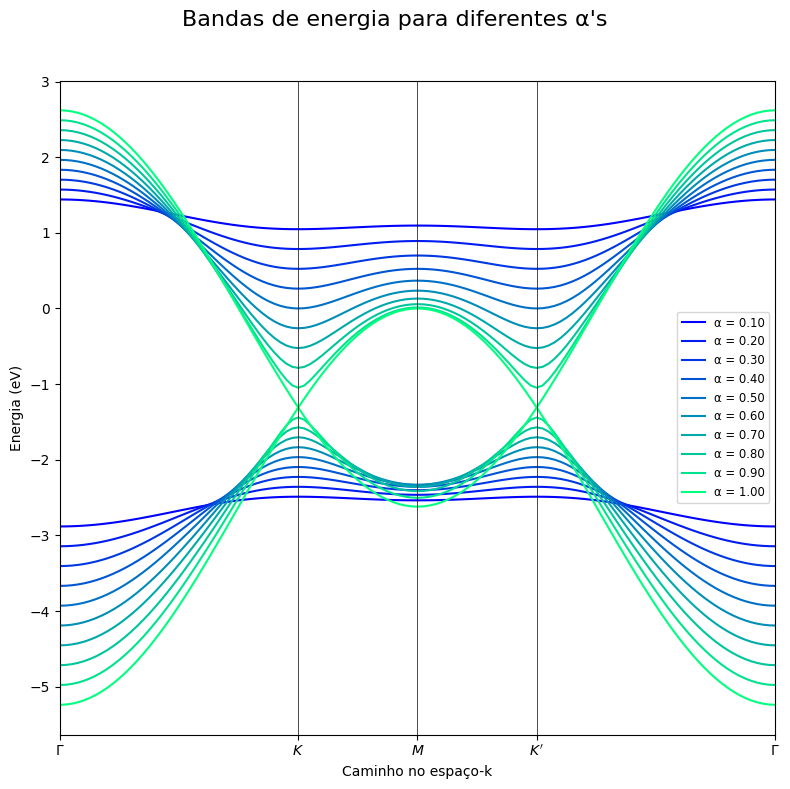

In [8]:
# Define os vetores da rede e as posições dos orbitais
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]  # Vetores de base da rede
orb = [[1./3., 1./3.], [2./3., 1./3.], [1./3., 2./3.]]  # Posições dos orbitais

# Define o valor de alpha
alpha = 0.1  # Exemplo de valor de alpha

# Cria o modelo tight-binding com 2 dimensões e 2 sítios
model = tb_model(2, 2, lat, orb)

t = -1.31  # Valor do hopping

# Define as energias on-site para cada orbital
onsite_energies = [0, 0, 0]  
model.set_onsite(onsite_energies)

# Define as interações de hopping entre os orbitais
model.set_hop(t, 0, 1, [0, 0])   
model.set_hop(t, 0, 2, [0, 0]) 
model.set_hop(t, 1, 2, [0, 0]) 
model.set_hop(t * alpha, 1, 0, [0, 1])  # Hopping dependente de alpha
model.set_hop(t * alpha, 2, 0, [1, 0])  # Hopping dependente de alpha
model.set_hop(t * alpha, 1, 2, [-1, 1]) # Hopping dependente de alpha

# Estrutura do modelo tight-binding
(fig, ax) = model.visualize(0, 1)
ax.set_title(f"Visualização do Modelo Tight-Binding")
fig.savefig("modelo_vizualizacao.pdf")

# Parâmetros para o cálculo da banda
alphas = np.linspace(0.1, 1.0, 10) 
nk = 121  
path = [[0., 0.], [2./3., 1./3.], [1., 0.5], [4./3., 2./3.], [2., 1.]]  
labels = (r'$\Gamma$', r'$K$', r'$M$', r"$K'$", r'$\Gamma$')


fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle("Bandas de energia para diferentes α's", fontsize=16)
cmap = cm.get_cmap('winter', len(alphas))

# Calcula e plota as bandas de energia para cada alpha
for idx, alpha in enumerate(alphas):
    # Cria um novo modelo para o valor de alpha
    model = tb_model(2, 2, lat, orb)
    
    # Define as energias on-site para cada orbital
    model.set_onsite(onsite_energies)
    
    # Define as interações de hopping entre os orbitais
    model.set_hop(t, 0, 1, [0, 0])   
    model.set_hop(t, 0, 2, [0, 0]) 
    model.set_hop(t, 1, 2, [0, 0]) 
    model.set_hop(t * alpha, 1, 0, [0, 1])  # Hopping dependente de alpha
    model.set_hop(t * alpha, 2, 0, [1, 0])  # Hopping dependente de alpha
    model.set_hop(t * alpha, 1, 2, [-1, 1]) # Hopping dependente de alpha
    
    # Calcula o caminho no espaço k
    k_vec, k_dist, k_node = model.k_path(path, nk)
    
    # Resolve as energias para todos os k-points
    evals = model.solve_all(k_vec)
    
    # Plota as bandas com a mesma cor para cada valor de alpha
    ax.plot(k_dist, evals[0], color=cmap(idx), linestyle='-', label=f"α = {alpha:.2f}")
    ax.plot(k_dist, evals[1], color=cmap(idx), linestyle='-')

ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(labels)
ax.set_ylabel("Energia (eV)")
ax.set_xlabel("Caminho no espaço-k")
ax.legend(loc="best", fontsize='small')  

# Adiciona linhas verticais para cada ponto no caminho k
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('bandas.jpg')
plt.show()

#### **Sobre os resultados...**
Ao comparar esse resultado com  do artigo [1]. Podemos perceber que, de fato, a introdução de vacâncias deve induzir o aparecimento de bandas dentro do gap do material, com a possibilidade de transição de fase, dependendo da densidade de vacâncias e da modulação do parâmetro `alpha`. A transição de fase pode ser identificada pela observação de um fechamento de gap e reabertura com características de estados de borda protegidos,que indicam uma fase topológica.

Quando o valor de `alpha` é alto, o hopping é menos atenuado, pois diminui a capacidade de um elétron poder se deslocar de um átomo para outro, indicando uma maior proximidade entre os estados localizados das vacâncias ja que o transporte de elétrons é dificultado.

### Referências

[1] Crasto de Lima, F., & Fazzio, A. (2021). At the verge of topology: vacancy-driven quantum spin Hall in trivial insulators. Nano Letters, 21(22), 9398-9402.

[2] Python Tight Binding. (2024). Documentação da PythTB. Retirado em 09 de novembro de 2024. Aceso em: https://www.physics.rutgers.edu/pythtb/

#### **Disclaimer**
O ChatGPT foi utilizado para melhorar esteticamente o texto latex e corrigir um erro do código.